In [1]:
# Numerical libraries
import numpy as np   

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score

# to handle data in form of rows and columns 
import pandas as pd    

# importing ploting libraries
import matplotlib.pyplot as plt   

import statsmodels.formula.api as sm

#importing seaborn for statistical plots
import seaborn as sns

import hashlib
import datetime

# import time
# from datetime import datetime
from time import strftime, gmtime

import statsmodels.formula.api as smf
#maschine learning libraries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 

from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from random import sample

sns.set_theme(style="darkgrid")
from data_loading import load_data
from functions import *


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [2]:
# import data by using the load_data() function
flights_test, flights_train = load_data()


In [3]:
origin_features =  ['DISTANCE', 'SCHEDULED_TIME', 'initial_delay',
                    'SCHEDULED_ARRIVAL', 'scheduled_departure_timestamp',
                    'TAXI_OUT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                    'WHEELS_OFF', 'departure_timestamp', 'DAY', 
                    # 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                    # 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                    ]

arrival_delay = 'ARRIVAL_DELAY'

# using the full set for training
training_set = flights_train[origin_features + [arrival_delay]].sample(10000)

# separating the variable that is to be predicted by the model from the rest
X = training_set.drop(arrival_delay, axis=1)
y = training_set[arrival_delay]

features = X.columns

# built a validation set on flights_train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [4]:
Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

# le = LabelEncoder()


In [5]:
# sc1=StandardScaler()
# X_train_sc=sc1.fit_transform(X_train)
# X_test_sc=sc1.transform(X_test)

In [6]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train,y_train)
    Y_predict=model1.predict(X_test)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()

/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415330.76997706754, tolerance: 1402.2714339875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85515e-18): result may not be accurate.
  overwrite_a=True).T


Lasso
Mean Absolute Error: 7.478207487990495
Mean Squared Error: 110.83809907420591
Root Mean Squared Error: 10.527967471179132
R2 :  0.9369956289882961

Linear Regression
Mean Absolute Error: 7.478578302645347
Mean Squared Error: 110.88725913464776
Root Mean Squared Error: 10.530301948882936
R2 :  0.9369676846378163

Ridge
Mean Absolute Error: 7.478471965756127
Mean Squared Error: 110.88520873407475
Root Mean Squared Error: 10.53020459127337
R2 :  0.936968850159415

Random forest Regressor
Mean Absolute Error: 11.346
Mean Squared Error: 245.298
Root Mean Squared Error: 15.661992210443728
R2 :  0.8605637742841299

Decision Tree Regressor
Mean Absolute Error: 8.17325
Mean Squared Error: 142.8693616
Root Mean Squared Error: 11.95279722910081
R2 :  0.9187879047039117

Boosted Linear
Mean Absolute Error: 7.729946941554998
Mean Squared Error: 113.87173000924784
Root Mean Squared Error: 10.671069768736771
R2 :  0.9352712038083225



/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434280.55930217664, tolerance: 1274.2548918874998
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769839.0247387165, tolerance: 1535.3107724875001
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1519346.5910195208, tolerance: 2261.1772346875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordin

Boosted Lasso
Mean Absolute Error: 7.75515764665802
Mean Squared Error: 114.3810455928368
Root Mean Squared Error: 10.694907460695338
R2 :  0.9349816904707743

Boosted Ridge
Mean Absolute Error: 7.737999923859841
Mean Squared Error: 113.86485478761053
Root Mean Squared Error: 10.670747620837563
R2 :  0.9352751119321395

Bagged Linear
Mean Absolute Error: 7.4791198235321135
Mean Squared Error: 110.99350932447071
Root Mean Squared Error: 10.53534571452075
R2 :  0.9369072881998083



/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425010.15867180825, tolerance: 1204.9655099875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416341.1568309012, tolerance: 1328.3614799999993
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423814.30673536926, tolerance: 1405.4509757999995
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordin

Bagged Lasso
Mean Absolute Error: 7.479410077952379
Mean Squared Error: 110.96198718334674
Root Mean Squared Error: 10.533849589933716
R2 :  0.9369252065211351

Bagged Ridge
Mean Absolute Error: 7.479123039747379
Mean Squared Error: 110.9938228010236
Root Mean Squared Error: 10.535360591884057
R2 :  0.9369071100084354



/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415597.25927469955, tolerance: 1362.6142883875002
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 402043.54262287536, tolerance: 1259.7633859500013
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.95488e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.00705e-18): result may

Lasso


/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415330.76997706754, tolerance: 1402.2714339875
  positive)


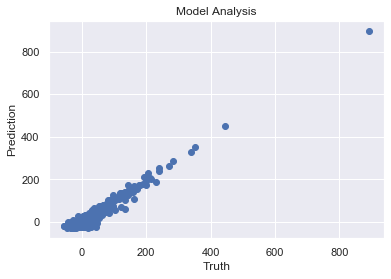

Linear Regression


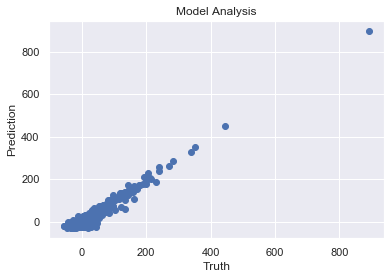

Ridge


/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85515e-18): result may not be accurate.
  overwrite_a=True).T


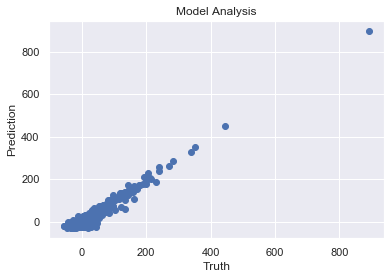

Random forest Regressor


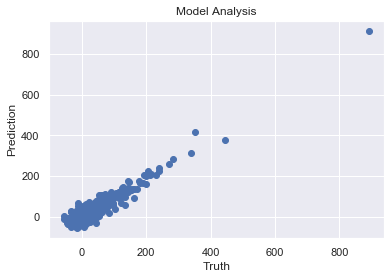

Decision Tree Regressor


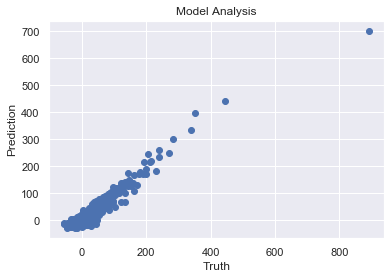

Boosted Linear


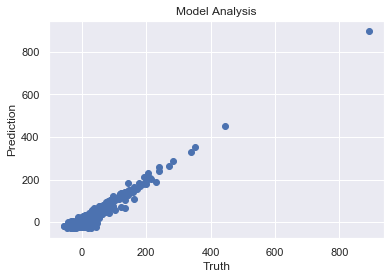

/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434280.55930217664, tolerance: 1274.2548918874998
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 769839.0247387165, tolerance: 1535.3107724875001
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1519346.5910195208, tolerance: 2261.1772346875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordin

Boosted Lasso


/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6128076.410588433, tolerance: 4773.78649988751
  positive)


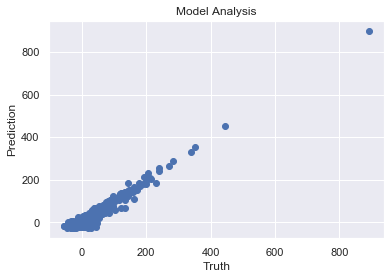

/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.94004e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.92395e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.92203e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.6906e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarn

Boosted Ridge


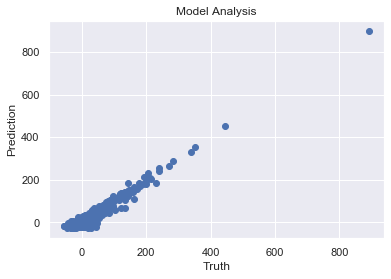

Bagged Linear


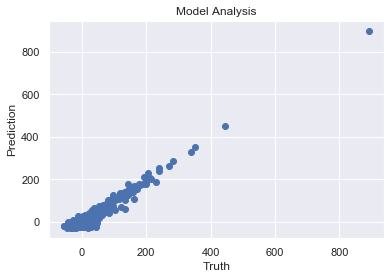

/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 425010.15867180825, tolerance: 1204.9655099875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 416341.1568309012, tolerance: 1328.3614799999993
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 423814.30673536926, tolerance: 1405.4509757999995
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordin

Bagged Lasso


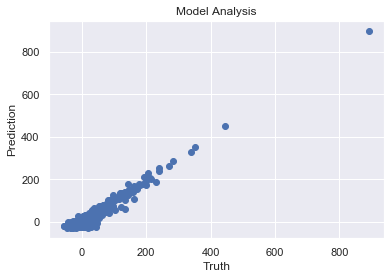

Bagged Ridge


/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.95488e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.00705e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=3.07698e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.96843e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWar

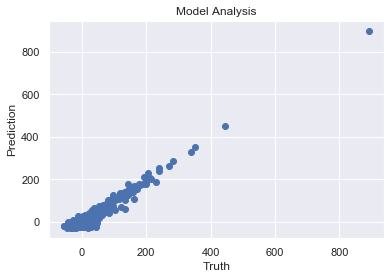

In [8]:
# visualises outcomes

for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train,y_train)
    Y_predict=model1.predict(X_test)
    print(name)
    plt.scatter(y_test, Y_predict)
    plt.title("Model Analysis")
    plt.xlabel("Truth")
    plt.ylabel("Prediction")
    plt.show()

In [22]:
# df['C'] = df['C'].apply(np.int64)


# tr'ARRIVAL_DELAY'
# y = training_set[arrival_delay]

display()

2580132    28.0
748388     -2.0
49358      29.0
430143    -14.0
1367392   -11.0
           ... 
1701597    64.0
458415    -11.0
2099844    -7.0
2105262    38.0
1555832    12.0
Name: ARRIVAL_DELAY, Length: 10000, dtype: float64

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

model_columns = []
models_compare = pd.DataFrame(columns = model_columns)
results=[]

row_index = 0
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

    model1 = model.fit(X_train,y_train)
    Y_predict = model1.predict(X_test)
    results.append(Y_predict)
    mae_score = mean_absolute_error(y_test, Y_predict)
    mse_score = mean_squared_error(y_test, Y_predict)
    rmse_score = np.sqrt(mean_squared_error(y_test, Y_predict))
    # r2_score = r2_score(y_test, Y_predict)
    # MLA_name = alg.__class__.__name__
    models_compare.loc[row_index,'Model Name'] = name
    models_compare.loc[row_index, 'MAE'] = mae_score
    models_compare.loc[row_index, 'MSE'] = mse_score
    models_compare.loc[row_index, 'RMSE'] = rmse_score   

    # cv_results = cross_val_score(model, X_train, y_train, cv=10)
    # results.append(cv_results)
    # predicted = model.fit(X_train, y_train).predict(X_test)
    # fp, tp, th = roc_curve(y_test, predicted)
    # MLA_name = model.__class__.__name__
    # MLA_compare.loc[row_index,'Model Name'] = model
    # MLA_compare.loc[row_index, 'Model Train Accuracy'] = round(model.score(X_train, y_train), 4)
    # MLA_compare.loc[row_index, 'Model Test Accuracy'] = round(model.score(X_test, y_test), 4)
    # MLA_compare.loc[row_index, 'Model AUC'] = auc(fp, tp)
    
    row_index+=1
    
models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
models_compare


/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 415330.76997706754, tolerance: 1402.2714339875
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.85515e-18): result may not be accurate.
  overwrite_a=True).T
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 434280.55930217664, tolerance: 1274.2548918874998
  positive)
/Users/rinusvangrunsven/opt/anaconda3/envs/aml/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might w

,Model Name,MAE,MSE,RMSE
0,Lasso,7.478207,110.838099,10.527967
2,Ridge,7.478472,110.885209,10.530205
1,Linear Regression,7.478578,110.887259,10.530302
9,Bagged Lasso,7.479410,110.961987,10.533850
8,Bagged Linear,7.479120,110.993509,10.535346
10,Bagged Ridge,7.479123,110.993823,10.535361
7,Boosted Ridge,7.738000,113.864855,10.670748
5,Boosted Linear,7.729947,113.871730,10.671070
6,Boosted Lasso,7.755158,114.381046,10.694907
4,Decision Tree Regressor,8.173250,142.869362,11.952797


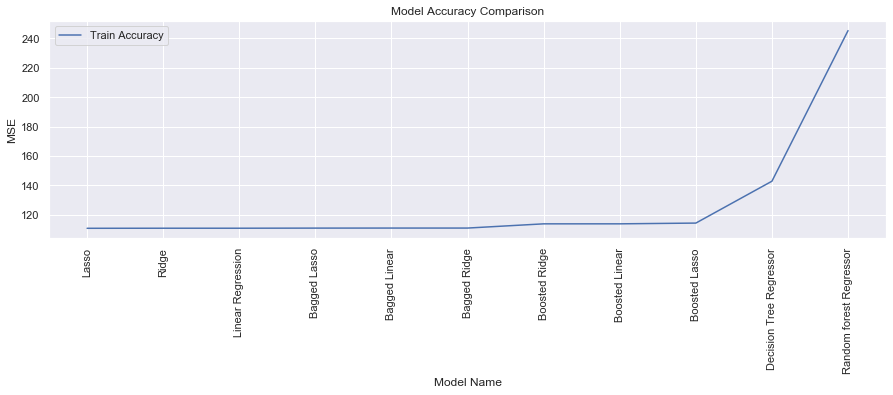

In [27]:
plt.subplots(figsize=(15,4))
sns.lineplot(x="Model Name", y="MSE",data=models_compare,label='Train Accuracy')
# sns.lineplot(x="Model Name", y="Model Test Accuracy",data=models_compare,label='Test Accuracy')
plt.xticks(rotation=90)
plt.title('Model Accuracy Comparison')
plt.legend()
plt.show()

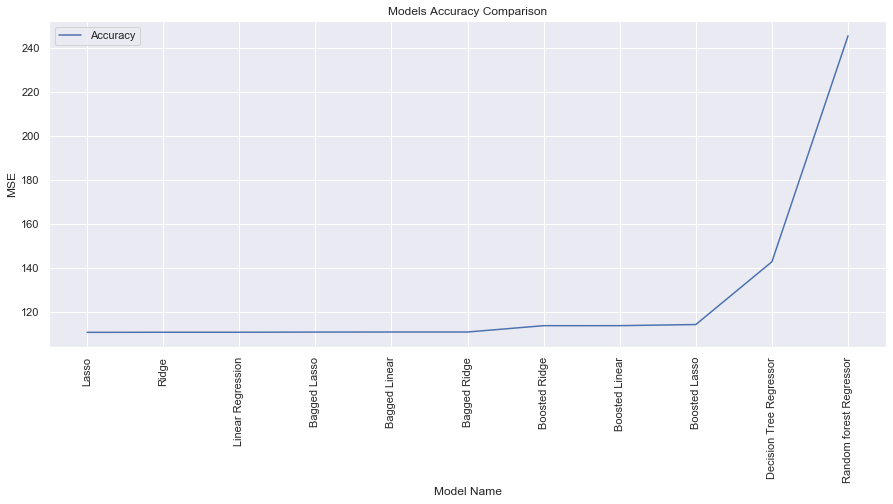

In [30]:
plt.subplots(figsize=(15,6))
sns.lineplot(x="Model Name", y="MSE",data=models_compare,palette='hot',label='Accuracy')

plt.xticks(rotation=90)
plt.title('Models Accuracy Comparison')
plt.legend()
plt.show()

In [ ]:
flights_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818553 entries, 0 to 2818552
Data columns (total 24 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   id                             int64  
 1   YEAR                           int64  
 2   MONTH                          int64  
 3   DAY                            int64  
 4   DAY_OF_WEEK                    int64  
 5   AIRLINE                        int64  
 6   FLIGHT_NUMBER                  int64  
 7   TAIL_NUMBER                    object 
 8   ORIGIN_AIRPORT                 int64  
 9   DESTINATION_AIRPORT            int64  
 10  SCHEDULED_DEPARTURE            int64  
 11  DEPARTURE_TIME                 float64
 12  TAXI_OUT                       float64
 13  WHEELS_OFF                     float64
 14  SCHEDULED_TIME                 float64
 15  DISTANCE                       int64  
 16  SCHEDULED_ARRIVAL              int64  
 17  ARRIVAL_DELAY                  float64
 18  sc

In [ ]:
origin_features = [
            'initial_delay', 
            'initial_delay_mean',
            # 'ORIGIN_AIRPORT',
            # 'DESTINATION_AIRPORT',
            'DISTANCE', 
            'DAY',
            'DAY_OF_WEEK',
            'MONTH',
            'ARRIVAL_DELAY'
            ]

features_test = np.array([a for a in origin_features if a != 'ARRIVAL_DELAY'])
submission_set = test_set[features_test]

# only do this if you got categorical features
# submission_set = pd.get_dummies(submission_set)

arrival_delay = 'ARRIVAL_DELAY'

# if the full set should be used for training
# training_subset = training_set[origin_features]
training_subset = training_set.sample(300000)[origin_features]

# separating the variable that is to be predicted by the model from the rest
X = training_subset.drop(arrival_delay, axis=1)
y = training_subset[arrival_delay]

# simple way of one-hot encoding (if categorical features are in the training set)
# X = pd.get_dummies(X)
# X = X[submission_set.columns]

features = X.columns

# built a validation set on flights_train
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 2)





In [ ]:
important_features = ['DISTANCE', 'SCHEDULED_TIME', 'initial_delay',
                      'SCHEDULED_ARRIVAL', 'scheduled_departure_timestamp',
                      'TAXI_OUT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME',
                      'WHEELS_OFF', 'departure_timestamp', 'DAY', 
                      # 'FLIGHT_NUMBER', 'TAIL_NUMBER', 
                      # 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'
                      ]

training_set = flights_train#.sample(300000)

X_train, X_val, y_train, y_val = train_test_split(training_set[important_features], training_set['ARRIVAL_DELAY'], test_size=0.2)

In [ ]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

In [ ]:


Las = Lasso()
LinR = LinearRegression()
Rid = Ridge()
Rfc = RandomForestRegressor(random_state=2)
Dtc = DecisionTreeRegressor(random_state = 2)
Boost_Lin = AdaBoostRegressor(base_estimator=LinR,random_state=2)
Boost_las = AdaBoostRegressor(base_estimator=Las,random_state=2)
Boost_rid = AdaBoostRegressor(base_estimator=Rid,random_state=2)
Bg_Lin = BaggingRegressor(base_estimator=LinR,random_state=2)
Bg_las = BaggingRegressor(base_estimator=Las,random_state=2)
Bg_rid = BaggingRegressor(base_estimator=Rid,random_state=2)

In [ ]:
for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
     ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
      'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):
    model1 = model.fit(X_train_sc,y_train)
    Y_predict=model1.predict(X_test_sc)
    print(name)
    print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
    print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
    print('R2 : ',r2_score(y_test, Y_predict))
    print()
    

Lasso
Mean Absolute Error: 9.643078717060016
Mean Squared Error: 252.2779428466003
Root Mean Squared Error: 15.88325983060783
R2 :  0.8475222028021444

Linear Regression
Mean Absolute Error: 9.538908920713514
Mean Squared Error: 247.3969345059253
Root Mean Squared Error: 15.728856745037934
R2 :  0.8504723037562458

Ridge
Mean Absolute Error: 9.53893341843388
Mean Squared Error: 247.39757327899167
Root Mean Squared Error: 15.72887705079392
R2 :  0.8504719176792508

Random forest Regressor
Mean Absolute Error: 13.500854629629629
Mean Squared Error: 379.17364390432107
Root Mean Squared Error: 19.472381567346122
R2 :  0.7708259337869653

Decision Tree Regressor
Mean Absolute Error: 9.58097634713404
Mean Squared Error: 205.65437761711817
Root Mean Squared Error: 14.340654713684385
R2 :  0.8757016720156884

Boosted Linear
Mean Absolute Error: 15.621463591544263
Mean Squared Error: 719.9937617126766
Root Mean Squared Error: 26.832699486124696
R2 :  0.5648328920737191

Boosted Lasso
Mean Absol

In [ ]:


# model_columns = []
# models_compare = pd.DataFrame(columns = model_columns)
# results=[]

# row_index = 0
# for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
#      ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
#       'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

#     model1 = model.fit(X_train_sc,y_train)
#     Y_predict = model1.predict(X_test_sc)
#     results.append(Y_predict)
#     mae_score = mean_absolute_error(y_test, Y_predict)
#     mse_score = mean_squared_error(y_test, Y_predict)
#     rmse_score = np.sqrt(mean_squared_error(y_test, Y_predict))
#     # r2_score = r2_score(y_test, Y_predict)
#     # MLA_name = alg.__class__.__name__
#     models_compare.loc[row_index,'Model Name'] = name
#     models_compare.loc[row_index, 'MAE'] = mae_score
#     models_compare.loc[row_index, 'MSE'] = mse_score
#     models_compare.loc[row_index, 'RMSE'] = rmse_score   

    
    
#     row_index+=1
    
# models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
# models_compare


In [ ]:
# model_columns = []
# models_compare = pd.DataFrame(columns = model_columns)
# results=[]

# row_index = 0
# for model, name in zip([Las,LinR,Rid,Dtc,Rfc,Boost_Lin,Boost_las,Boost_rid,Bg_Lin,Bg_las,Bg_rid], 
#      ['Lasso','Linear Regression','Ridge','Random forest Regressor','Decision Tree Regressor','Boosted Linear',
#       'Boosted Lasso','Boosted Ridge','Bagged Linear','Bagged Lasso','Bagged Ridge']):

#     model1 = model.fit(X_train_sc,y_train)
#     Y_predict = model1.predict(X_test_sc)
#     results.append(Y_predict)
#     mae_score = mean_absolute_error(y_test, Y_predict)
#     mse_score = mean_squared_error(y_test, Y_predict)
#     rmse_score = np.sqrt(mean_squared_error(y_test, Y_predict))
#     # r2_score = r2_score(y_test, Y_predict)
#     # MLA_name = alg.__class__.__name__
#     models_compare.loc[row_index,'Model Name'] = name
#     models_compare.loc[row_index, 'MAE'] = mae_score
#     # models_compare.loc[row_index, 'MSE'] = mse_score
#     models_compare.loc[row_index, 'RMSE'] = rmse_score   
#     models_compare.loc[row_index, 'R2 score'] = r2_score   
#     models_compare.loc[row_index, 'MSE Train'] = round(model.score(X_train, y_train), 4)
#     models_compare.loc[row_index, 'MSE Test'] = round(model.score(X_test, y_test), 4)
#     models_compare.loc[row_index, 'MSE Train Accuracy'] = round(model.score(X_train, y_train), 4)
#     models_compare.loc[row_index, 'MSE Test Accuracy'] = round(model.score(X_test, y_test), 4)


    
#     row_index+=1
    
# models_compare.sort_values(by = ['MSE'], ascending = True, inplace = True)    
# models_compare


In [ ]:
# # plt.subplots(figsize=(15,4))
# # sns.lineplot(x="Model Name", y="MSE",data=models_compare,palette='hot',label='MSE')
# # sns.lineplot(x="Model Name", y="MAE",data=models_compare,palette='hot',label='MAE')
# # plt.xticks(rotation=90)
# # plt.title('MSE Accuracy Comparison')
# # plt.legend()
# # plt.show()

# plt.subplots(figsize=(15,4))
# sns.lineplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',label='Train Accuracy')
# sns.lineplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',label='Test Accuracy')
# plt.xticks(rotation=90)
# plt.title('MLA Accuracy Comparison')
# plt.legend()
# plt.show()

In [ ]:
# plt.subplots(figsize=(15,6))
# sns.lineplot(x="Model Name", y="MSE",data=models_compare,palette='hot',label='Accuracy')

# plt.xticks(rotation=90)
# plt.title('MSE Accuracy Comparison')
# plt.legend()
# plt.show()

In [ ]:
dtc = DecisionTreeRegressor(random_state = 2)

# {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 12}
# rf = Pipeline(steps=[#('preprocessor', preprocessor),
#                      ('regressor', rfr)])

# cv_scores = cross_val_score(rf, X, y, cv=5)
# print(cv_scores)

dtc.fit(X_train, y_train)

# dtc1 = dtc.fit(X_train_sc,y_train)
# Y_predict = dtc1.predict(X_test_sc)
# print(name)
# print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
# print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
# print('R2 : ',r2_score(y_test, Y_predict))
# print()

# dtc1.fit(X_train, y_train)

DecisionTreeRegressor(random_state=2)

In [ ]:
y_pred = dtc.predict(X_val[important_features])

predictions = pd.DataFrame({'predicted': y_pred, 'actual': y_val})

In [ ]:
y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
mean_squared_error = mse(y_test, y_pred)

print("R2: ", round(score, 3))
print("Mean Squared Error: ", round(mean_squared_error, 3))

ValueError: X has 6 features, but DecisionTreeRegressor is expecting 11 features as input.

In [ ]:
predictions = model.predict(flights_test[important_features])

submission = pd.DataFrame({'id': flights_test['id'], 'ARRIVAL_DELAY': predictions})
submission.to_csv('../submission_test1.csv', index=False)

# submission must have 514,384 rows
print(len(submission))

514384


In [ ]:
# y_pred = dtc.predict(X_test)
# score = dtc.score(X_test, y_test)
# mean_squared_error = mse(y_test, y_pred)

y_pred = dtc.predict(X_test)
score = dtc.score(X_test, y_test)
mean_squared_error = mse(y_test, y_pred)

X_train, X_val, y_train, y_val = train_test_split(training_set[important_features], training_set['ARRIVAL_DELAY'], test_size=0.2)

print("R2: ", round(score, 3))
print("Mean Squared Error: ", round(mean_squared_error, 3))

ValueError: X has 6 features, but DecisionTreeRegressor is expecting 11 features as input.

In [ ]:
# Dtc = DecisionTreeRegressor(random_state = 2)

# # {'max_depth': 8, 'max_features': 'auto', 'n_estimators': 12}
# # rf = Pipeline(steps=[#('preprocessor', preprocessor),
# #                      ('regressor', rfr)])

# # cv_scores = cross_val_score(rf, X, y, cv=5)
# # print(cv_scores)

# Dtc1 = Dtc.fit(X_train_sc,y_train)
# Y_predict=Dtc1.predict(X_test_sc)
# print(name)
# print('Mean Absolute Error:', mean_absolute_error(y_test, Y_predict))  
# print('Mean Squared Error:', mean_squared_error(y_test, Y_predict))  
# print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, Y_predict)))
# print('R2 : ',r2_score(y_test, Y_predict))
# print()

# Dtc1.fit(X_train, y_train)

In [ ]:
predictions = dtc.predict(flights_test)

submission = pd.DataFrame({'id': flights_test['id'], 'ARRIVAL_DELAY': predictions})
submission.to_csv('submission_1.csv', index=False)

# submission must have 514,384 rows
print(len(submission))

ValueError: could not convert string to float: 'NK'